In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [12]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [4]:
Y = pd.Series(data['Class'].to_numpy())

In [5]:
transform = preprocessing.StandardScaler()

X = transform.fit_transform(X)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [7]:
Y_test.shape

(18,)

In [8]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
logreg_cv.fit(X, Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [9]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8222222222222222


In [10]:
logreg_cv.score(X_test, Y_test)

0.9444444444444444

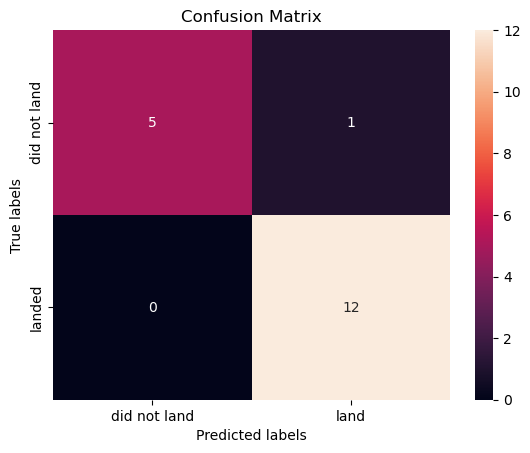

In [13]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [14]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

svm_cv.fit(X, Y)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8222222222222223


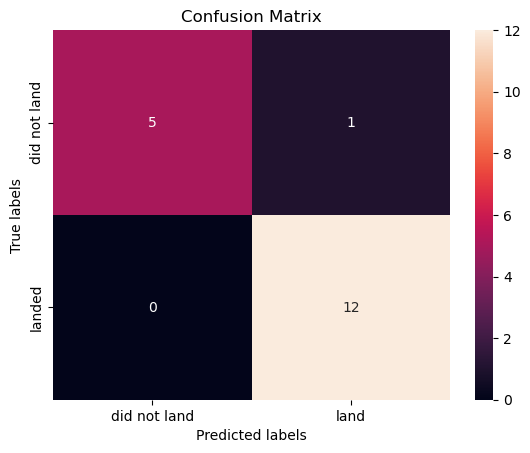

<Figure size 640x480 with 0 Axes>

In [15]:
svm_cv.score(X_test, Y_test)

yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
plt.savefig("bect_conf.png")

In [16]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
a = tree_cv.fit(X, Y)

print("tuned hpyerparameters :(best parameters) ",a.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.9111111111111111


C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\90553\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    v

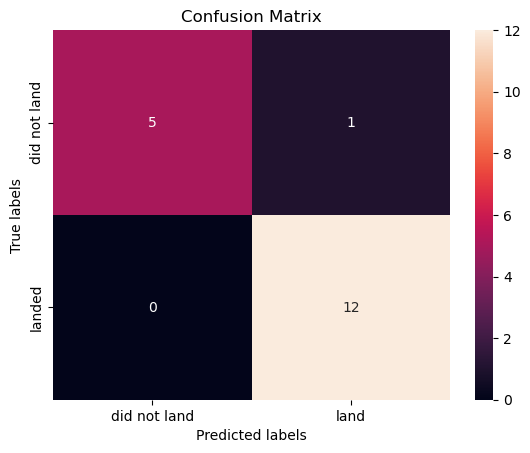

In [17]:
tree_cv.score(X_test, Y_test)

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [18]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Fit the GridSearchCV object to find the best parameters
knn_cv.fit(X, Y) 

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}
accuracy : 0.8444444444444444


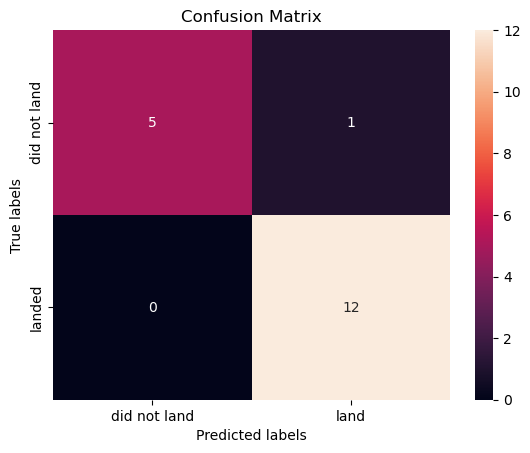

In [19]:
knn_cv.score(X_test, Y_test)

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Best performing method: SVM
Accuracy of the best method: 0.9444444444444444


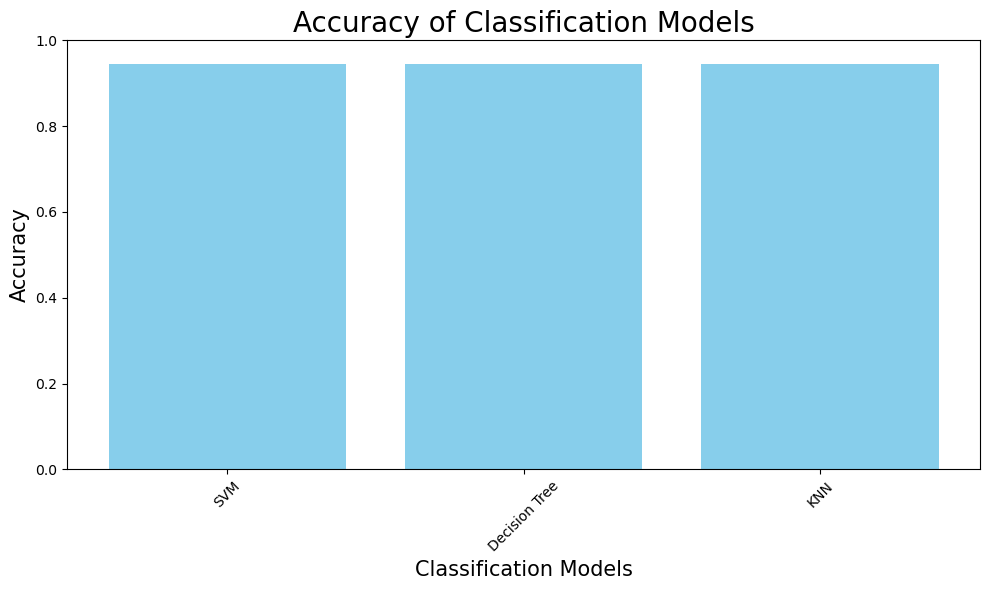

In [20]:
svm_best_model = svm_cv.best_estimator_
tree_best_model = a.best_estimator_
knn_best_model = knn_cv.best_estimator_

# Calculate the accuracy of each best-performing model on the test data (X_test, y_test)
svm_accuracy = svm_best_model.score(X_test, Y_test)  # Replace with your actual test data
tree_accuracy = tree_best_model.score(X_test, Y_test)
knn_accuracy = knn_best_model.score(X_test, Y_test)

# Find the method that performs best (highest accuracy on test data)
best_method = max([("SVM", svm_accuracy), ("Decision Tree", tree_accuracy), ("KNN", knn_accuracy)],
                  key=lambda x: x[1])

print("Best performing method:", best_method[0])
print("Accuracy of the best method:", best_method[1])

models = ['SVM', 'Decision Tree', 'KNN']
accuracies = [svm_accuracy, tree_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Classification Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Accuracy of Classification Models', fontsize=20)
plt.ylim(0, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy.png")